In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_histogram, plot_state_city, plot_circuit_layout
from math import pi
import matplotlib.ticker as tck

%matplotlib inline
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
backend_stv = Aer.get_backend('statevector_simulator')
backend_sim = Aer.get_backend('qasm_simulator')
backend_exp = provider.get_backend('ibmqx2')
sh=1024
y_exp=np.array([])
y_sim=np.array([])
x=np.arange(0,17*pi/(4*2),pi/(4*2))
x_th=np.arange(0,2*np.pi,0.1) 
y_th=((np.cos(2*x_th))+1)/2

In [2]:
def BeamS(q,qr,c,cr,f):
    circ=QuantumCircuit(qr,cr)
    for i in range(q-1):
        circ.cx(0,i+1)
    circ.h(0)
    for i in range(q-1):
        circ.cx(0,i+1)
    circ=f+circ
    return circ

In [3]:
def measu(qr,cr,f):
    meas=QuantumCircuit(qr,cr)
    meas.barrier(qr[:])
    meas.measure(qr[:],cr[:])
    qc=f+meas
    return qc

In [4]:
def phase(q,qr,c,cr,ph,f):
    circ=QuantumCircuit(qr,cr)
    for i in range(q):
        circ.u1(ph,i)
    return f+circ

In [5]:
#Create circuit
q=2
c=2
qr=QuantumRegister(q)
cr=ClassicalRegister(c)
MZ=QuantumCircuit(qr,cr)
#initialize state
#vec=np.zeros(2**q)
#vec[(2**q)-1]=1  
#MZ.initialize(vec, [qr[:]])
#BeamSplitter
MZ=BeamS(q,qr,c,cr,MZ)
#phase
MZ=phase(q,qr,c,cr,pi/(2*5),MZ)
#BeamSplitter
MZ=BeamS(q,qr,c,cr,MZ)
#measurements
MZ=measu(qr,cr,MZ)


MZ.draw()

┌───┐     ┌───────────┐     ┌───┐      ░ ┌─┐   
q0_0: |0>──■──┤ H ├──■──┤ U1(pi/10) ├──■──┤ H ├──■───░─┤M├───
         ┌─┴─┐└───┘┌─┴─┐├───────────┤┌─┴─┐└───┘┌─┴─┐ ░ └╥┘┌─┐
q0_1: |0>┤ X ├─────┤ X ├┤ U1(pi/10) ├┤ X ├─────┤ X ├─░──╫─┤M├
         └───┘     └───┘└───────────┘└───┘     └───┘ ░  ║ └╥┘
 c0_0: 0 ═══════════════════════════════════════════════╩══╬═
                                                           ║ 
 c0_1: 0 ══════════════════════════════════════════════════╩═

In [30]:
def MZI(q,qr,c,cr,ph):
    MZ=QuantumCircuit(qr,cr)
    #initialize state
    #vec=np.zeros(2**q)
    #vec[(2**q)-1]=1  
    #MZ.initialize(vec, [qr[:]])
    #Bit-Flips
    #for i in range(q):
    #    MZ.x(i)
    #BeamSplitter
    MZ=BeamS(q,qr,c,cr,MZ)
    #phase
    MZ=phase(q,qr,c,cr,ph,MZ)
    #BeamSplitter
    MZ=BeamS(q,qr,c,cr,MZ)
    #measurements
   # MZ=measu(qr,cr,MZ)
    return MZ

In [31]:
q=2
c=2
qr=QuantumRegister(q)
cr=ClassicalRegister(c)
Mz=MZI(q,qr,c,cr,(pi/(2*4)))
Mz.draw()

┌───┐     ┌──────────┐     ┌───┐     
q12_0: |0>──■──┤ H ├──■──┤ U1(pi/8) ├──■──┤ H ├──■──
          ┌─┴─┐└───┘┌─┴─┐├──────────┤┌─┴─┐└───┘┌─┴─┐
q12_1: |0>┤ X ├─────┤ X ├┤ U1(pi/8) ├┤ X ├─────┤ X ├
          └───┘     └───┘└──────────┘└───┘     └───┘
 c12_0: 0 ══════════════════════════════════════════
                                                    
 c12_1: 0 ══════════════════════════════════════════

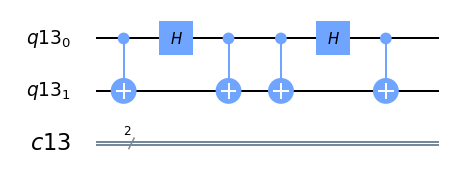

In [32]:
#Sim BS
q=2
c=2
qr=QuantumRegister(q)
cr=ClassicalRegister(c)
BS=QuantumCircuit(qr,cr)

#initialize state
#vec=np.zeros(2**q)
#vec[(2**q)-1]=1  
#MZ.initialize(vec, [qr[:]])

#Bit-Flips
#for i in range(q):
#BS.x(0)

#BeamSplitters
BS=BeamS(q,qr,c,cr,BS)
BS=BeamS(q,qr,c,cr,BS)
#BS=measu(qr,cr,BS)



style={'cregbundle':True,'dpi':300,'fontsize':15,'subfontsize':15,'margin':[1,0.1,0.1,0.1], 'displaytext':{
    'id': 'id',
    'u0': 'U_0',
    'u1': 'U_1',
    'u2': 'U_2',
    'u3': 'U_3',
    'x': 'X',
    'y': 'Y',
    'z': 'Z',
    'h': 'H',
    's': 'S',
    'sdg': 'S^\dagger',
    't': 'T',
    'tdg': 'T^\dagger',
    'rx': 'R_x',
    'ry': 'R_y',
    'rz': 'R_z',
    'reset': '\left|0\right\rangle',
    'unitary': 'C^{2}'
}}
BS.draw(output='mpl',style=style,plot_barriers=False,justify='right',fold=30,filename='C2_2qubit_circuit.pdf')

In [33]:
job=execute(Mz,backend_stv)
result=job.result()
outputstate=result.get_statevector(Mz,decimals=3)
print(outputstate)

[0.854+0.354j 0.   +0.j    0.   +0.j    0.146-0.354j]


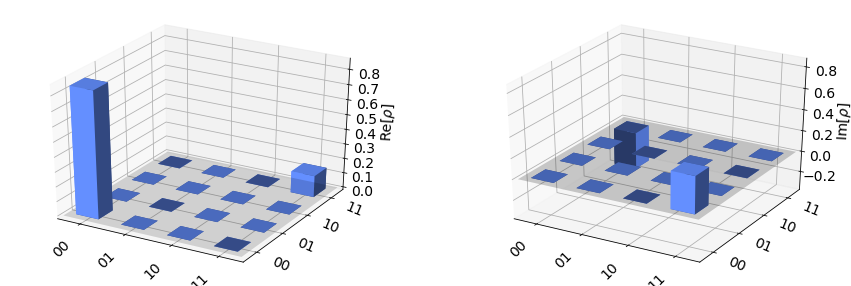

In [19]:
plot_state_city(outputstate)

In [15]:
backend_uni=Aer.get_backend('unitary_simulator')
job=execute(BS,backend_uni)
result=job.result()
outputstate=result.get_unitary(BS,decimals=3)
print(outputstate)

[[1.-0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.-0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.-0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.-0.j]]


In [8]:
#simulating every circuit
circuits=[]
for i in range(len(x)):
    q=2
    c=2
    qr=QuantumRegister(q)
    cr=ClassicalRegister(c)
    MZ=MZI(q,qr,c,cr,x[i])
    circuits.append(MZ)
    
job_sim=execute(circuits,backend=backend_sim, shots=sh)
result_sim=job_sim.result()

y_sim=np.array([])
    
for i in range(len(x)):
    counts_sim=result_sim.get_counts(circuits[i])
    try:
        counts_sim['00']
    except KeyError:
         y_sim=np.append(y_sim,[0])
    else:
        y_sim=np.append(y_sim,[counts_sim['00']/sh])
        
y_sim




array([1.        , 0.85253906, 0.48730469, 0.15332031, 0.        ,
       0.13476562, 0.51367188, 0.85058594, 1.        , 0.83789062,
       0.50390625, 0.13183594, 0.        , 0.13964844, 0.50488281,
       0.83886719, 1.        ])

In [9]:
#EXP every circuit
circuits_tp=[]
for i in range(17):
    circuits_tp.append( transpile(circuits[i], backend=backend_exp, optimization_level=3, initial_layout=[2,0,1,3,4]))

#job_exp= execute(circuits_tp, backend=backend_exp)
#job_exp.job_id()

In [10]:
job_exp = backend_exp.retrieve_job('5e88fbc9c9a5d70019018f12')
result_exp=job_exp.result()
y_exp=np.array([])

for i in range(len(x)):
    counts_exp=result_exp.get_counts(i)
    try:
        counts_exp['00']
    except KeyError:
         y_exp=np.append(y_exp,[0])
    else:
        y_exp=np.append(y_exp,[counts_exp['00']/sh])
        
y_exp

array([0.9921875 , 0.80859375, 0.51367188, 0.15625   , 0.02148438,
       0.15722656, 0.48828125, 0.82714844, 0.99414062, 0.84375   ,
       0.49023438, 0.15820312, 0.01660156, 0.15429688, 0.46484375,
       0.82226562, 0.99023438])

In [11]:
y_sim

array([1.        , 0.85253906, 0.48730469, 0.15332031, 0.        ,
       0.13476562, 0.51367188, 0.85058594, 1.        , 0.83789062,
       0.50390625, 0.13183594, 0.        , 0.13964844, 0.50488281,
       0.83886719, 1.        ])

In [12]:
x

array([0.        , 0.39269908, 0.78539816, 1.17809725, 1.57079633,
       1.96349541, 2.35619449, 2.74889357, 3.14159265, 3.53429174,
       3.92699082, 4.3196899 , 4.71238898, 5.10508806, 5.49778714,
       5.89048623, 6.28318531])

In [13]:
y_exp

array([0.9921875 , 0.80859375, 0.51367188, 0.15625   , 0.02148438,
       0.15722656, 0.48828125, 0.82714844, 0.99414062, 0.84375   ,
       0.49023438, 0.15820312, 0.01660156, 0.15429688, 0.46484375,
       0.82226562, 0.99023438])

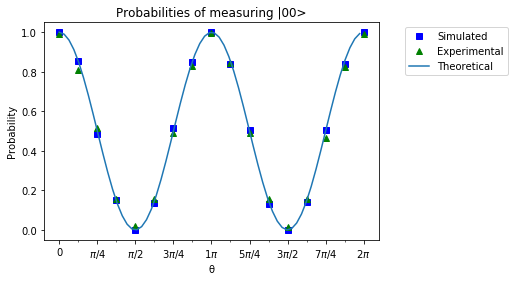

In [14]:
fig, ax = plt.subplots()
ax.plot(x,y_sim,'bs',x,y_exp,'g^',x_th,y_th)
plt.xlabel('θ') 
plt.ylabel('Probability')
plt.title('Probabilities of measuring |00>')
lg=plt.legend(['Simulated', 'Experimental','Theoretical'],loc=1, bbox_to_anchor=(1.4,1))
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 4))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 8))

def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(4 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/4$"
    elif N == 2:
        return r"$\pi/2$"
    elif N== 6:
        return r"$3\pi/2$"
    elif N % 2 > 0:
        return r"${0}\pi/4$".format(N)
    else:
        return r"${0}\pi$".format(N // 4)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

plt.show()
fig.savefig('MZ_2Qubit_graph.pdf',bbox_extra_artists=(lg,), bbox_inches='tight')


In [15]:
print(MZ_tp)

NameError: name 'MZ_tp' is not defined